<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Predicting_Customer_Churn_Identifying_Customers_that_are_Susceptible_to_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import packages

In [49]:
# Pour évaluer des expressions Python passées en tant que chaînes de caractères
from ast import literal_eval

# Pour la manipulation et l'analyse de données tabulaires
import pandas as pd

# Pour les calculs numériques avancés
import numpy as np

# Pour la création de visualisations graphiques
import matplotlib.pyplot as plt

# Pour la création de visualisations statistiques avancées
import seaborn as sns

# Pour l'évaluation des performances des modèles de machine learning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

# Pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Pour normaliser ou standardiser les données
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Pour l'entraînement de modèles de régression logistique
from sklearn.linear_model import LogisticRegression

# Pour l'entraînement de modèles de classification par arbres de décision
from sklearn.tree import DecisionTreeClassifier

# Pour afficher une barre de progression pendant les boucles
from tqdm import tqdm

# Pour ignorer les avertissements pendant l'exécution du code
import warnings
warnings.filterwarnings('ignore')


###Data Collection

Load the dataset into Python with Pandas

In [ ]:
!pip install gdown

import gdown

#https://docs.google.com/spreadsheets/d/1zo5Iq61sohn4a8K1P4JxhLizZAWSU_rE/edit?usp=sharing&ouid=111409847823038023931&rtpof=true&sd=true
file_id = "1zo5Iq61sohn4a8K1P4JxhLizZAWSU_rE"

output_file = "Dataset.xlsx"

gdown.download(id = file_id, output = output_file, quiet = False)

df = pd.read_excel(output_file)

Downloading...
From: https://drive.google.com/uc?id=1zo5Iq61sohn4a8K1P4JxhLizZAWSU_rE
To: /content/Dataset.xlsx
100%|██████████| 9.98M/9.98M [00:00<00:00, 19.2MB/s]


###Data Exploration

In Data Exploration, we will be looking at :

-  understanding the data structure, statistics and quality of dataset

-  visualizing the dataset to gain  insights

-  checking for missing values

###See a few  first rows  of dataset

In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


##Checking for mising values

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

Check for duplicated values

In [ ]:
df.duplicated().any()

False

Get a statistical overview of the numerical  columns in the dataset

In [ ]:
starts_overview = df.describe()

starts_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


Next we see how the target label `ChurnLabel` and some of the other variables are distributed

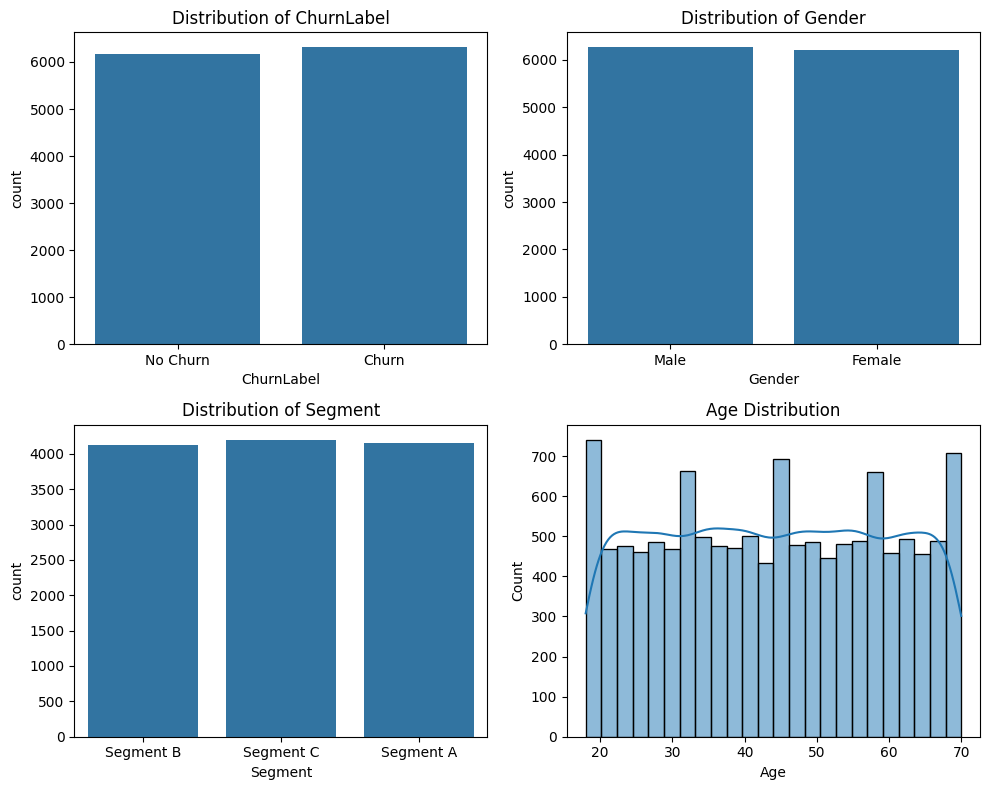

In [ ]:
# Setup the figure and the axes
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Plot the distribution  of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])


# Plot the distribution  of the Gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# Plot the distribution of  Segment
sns.countplot(x='Segment', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

# Age distribution
sns.histplot(x='Age', data=df, ax=ax[1, 1], kde=True)
ax[1, 1].set_title('Age Distribution')

# Show the plot
plt.tight_layout()
plt.show();
plt.close("all")

Correlation Analysis : Which columns in the dataset  correlates with  the `ChurnLabel` column

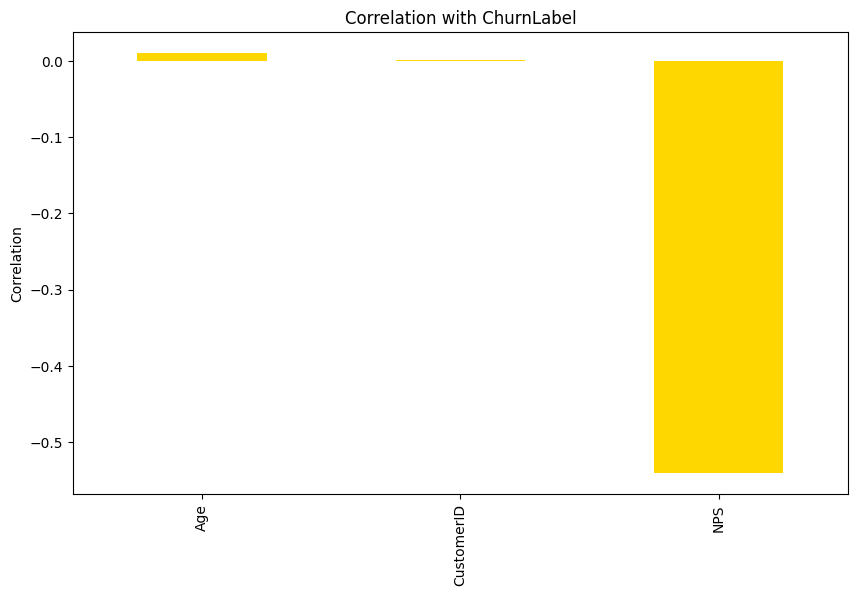

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [ ]:
# Calulate correlation with   ChurnLabel

correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='gold')
#plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation with ChurnLabel')
plt.xticks(rotation=90)
plt.show()
plt.close("all")

correlation

We're going to be exploring the nested columns next, and see  how they are  nested / Nous allons ensuite explorer les colonnes imbriquées et voir comment elles sont imbriquées

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp'],
      dtype='object')

In [ ]:
# Liste de toutes les colonnes imbriquées

nested_columns = [
    'PurchaseHistory',             # Historique des achats
    'SubscriptionDetails',         # Détails de l'abonnement
    'ServiceInteractions',         # Interactions avec le service
    'PaymentHistory',              # Historique des paiements
    'WebsiteUsage',                # Utilisation du site web
    'ClickstreamData',             # Données de clics
    'EngagementMetrics',           # Mesures d'engagement
    'Feedback',                    # Retours d'expérience
    'MarketingCommunication'       # Communication marketing
]

# Définir les largeurs des colonnes pour l'affichage
w1, w2 = 25, 1000

# Parcourir chaque colonne imbriquée
for col in nested_columns:
    # Créer une liste avec le nom de la colonne et la première valeur de cette colonne
    row = [col, df[col][0]]

    # Afficher le nom de la colonne et la première valeur avec un formatage spécifique
    print("\n | {:<{w1}} | {:<{w2}}".format(*row, w1=w1, w2=w2))



 | PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Temporal Analysis : Here, we take a look at  how the churn rate change overtime , to see if there are any recurring patterns

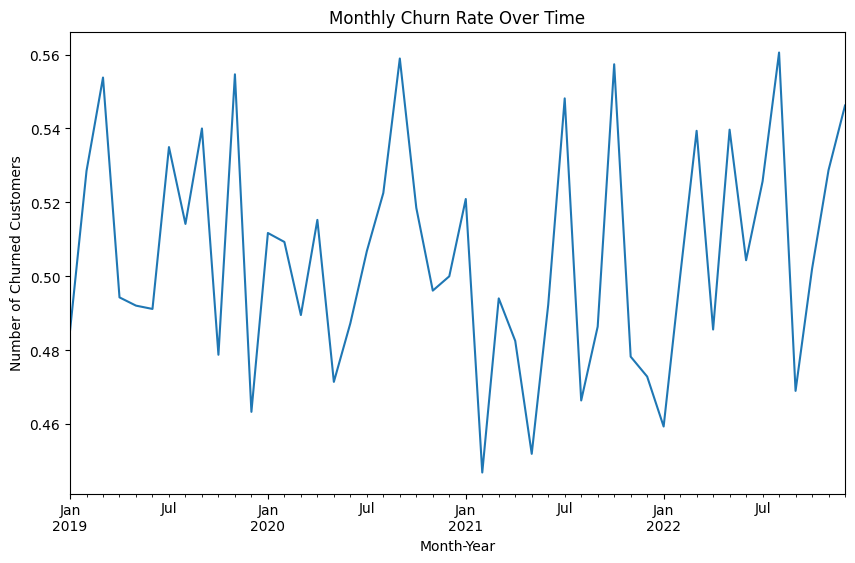

In [ ]:
# Convert the Timestamp to datetime format so that it can be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Group by MonthYear and calculate the churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].mean()

# Plot the monthly churn rate over time
plt.figure(figsize=(10, 6))
monthly_churn_rate.plot()
plt.xlabel('Month-Year')
plt.ylabel('Number of Churned Customers')
plt.title('Monthly Churn Rate Over Time')
plt.show()
plt.close("all")

We also need to see if there are any patterns  between the  customer feedback `Rating` and the `ChurnLabel`

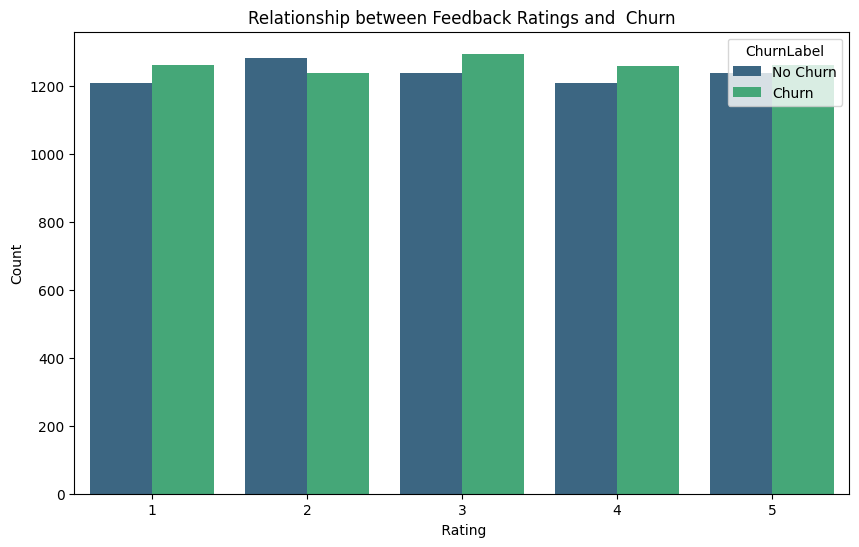

In [ ]:
 # Extracting     rating the from  the Feedback column  and creation  a new  column  for it

 df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

 # Plotting the relationship between beedback ratings and  churn
 plt.figure(figsize=(10, 6))
 sns.countplot(x='FeedbackRating', hue='ChurnLabel', data=df, palette='viridis')
 plt.title('Relationship between Feedback Ratings and  Churn')
 plt.xlabel(' Rating')
 plt.ylabel('Count')
 plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
 plt.show()
 plt.close("all")

From the visual, there doesn't seem to be  any indication  that the `Feedback`  rating affects the `ChurLabel`

###Data Preprocessing and Features Engineering

Here, we will do ⁉
-   Create  new features that may have a predictive power

-   Convert categorical  variables  to numeric variables,  using encoding techniques

-   Scale or normalize numeric variables if  necessary

-   Remove irrelevant features

We  begin  by converting  nested  values from  string  formats  to list/dictionaries using `literal_eval`  function

In [ ]:
# List  nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]


# Apply the literal_eval function
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating'],
      dtype='object')

###More features will be extracted from the dataset

In [ ]:
#  PurchaseHistory

df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x] ))

df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x] ))

df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x] ))

# 'SubscriptionDetails'

df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])

df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])

df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])

df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days


# 'WebsiteUsage'
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])

df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# 'EngagementMetrics'

df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])

df['EngagementMetricsFequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])



# 'Feedback'
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])

df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

#'MarketingCommunication'
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))

df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
        - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)

df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
        - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)

###Special extraction from  three columns

-   `ServiceInteractions`,

-   `PaymentHistory`,

-   `ClickStremData`

##Check of the unique parameters / values in  these columns

In [ ]:
## Get all unique  ServiceInteraction "Types"

service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))

service_interaction_types = service_interaction_types.to_list()

unique_service_interaction_type = []

for i in service_interaction_types:
    unique_service_interaction_type.extend(i)

unique_service_interaction_type = list(set(unique_service_interaction_type))

print('All unique service  Interaction Types', unique_service_interaction_type)

# Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_method = []

for i in payment_history_methods:
    unique_payment_history_method.extend(i)

unique_payment_history_method = list(set(unique_payment_history_method))
print('All unique PaymentHistory Methods', unique_payment_history_method)


# Get all unique  ClickStreamData
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_action = []

for i in clickstream_data_actions:
    unique_clickstream_data_action.extend(i)

unique_clickstream_data_action = list(set(unique_clickstream_data_action))
print('All unique ClickStreamData Actions', unique_clickstream_data_action)


All unique service  Interaction Types ['Email', 'Call', 'Chat']
All unique PaymentHistory Methods ['Bank Transfer', 'PayPal', 'Credit Card']
All unique ClickStreamData Actions ['Click', 'Add to Cart', 'Search']


###From these three columns, we're going to be encoding more

In [ ]:
# ServiceInteractions
for usit in  unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for  i in x))

df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

 # ClickStreamData
for ucda in unique_clickstream_data_action:
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))





# ClickstreamData
#df['ClickstreamDataNoOfClicks'] = df['ClickstreamData'].apply(lambda x: len(x))

See a subset  of  the new data


In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationSentOpenDiff,ServiceInteractions_Email,ServiceInteractions_Call,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamDataNoOfClicks
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,818.0,1,1,2,40,13.333333,4,8,12,24
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,110.0,10,5,4,10,3.333333,9,8,7,24
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,333.0,1,1,1,8,2.666667,3,2,7,12
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,159.0,18,17,24,79,26.333333,16,15,16,47
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,193.0,5,4,1,2,0.666667,9,17,4,30


See all the columns we hav now

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Call', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData_Cli

###Pick out  some columns next

In [ ]:
df_ = df[[
    'Age',
    "Gender",
    'NPS',
    "ChurnLabel",
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Add to Cart',
    'ClickstreamData_Search',
    "SubscriptionDuration"
]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,4,5,1,2,9,17,4,580


Let's see the names of all the columns  we  have now

In [ ]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFequency               Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickstreamData_Click                        4
ClickstreamData_Add to Cart                  8
ClickstreamDa

Let's check for numer of unique values

In [ ]:
print('Total dataset lenght', len(df))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFequency']].nunique()

Total dataset lenght 12483


Gender                        2
SubscriptionPlan             20
EngagementMetricsFequency     3
dtype: int64

##Encoding  the string parameters

In [ ]:
# Gender  encoder
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan encoder
unique_subscription_plan = df_['SubscriptionPlan'].unique()
subcription_plan_map = {unique_subscription_plan[i]: i for i in range(len(unique_subscription_plan))}

# EngagementMetricsFequency encoder
unique_engagement_frequency = df_['EngagementMetricsFequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subcription_plan_map)
df_.loc[:, 'EngagementMetricsFequency'] = df_.loc[:, 'EngagementMetricsFequency'].map(engagement_frequency_map)

In [ ]:
df_.loc[0]

Age                                         31
Gender                                       0
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFequency                    0
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickstreamData_Click                        4
ClickstreamData_Add to Cart                  8
ClickstreamDa

##Plot correlation matrix

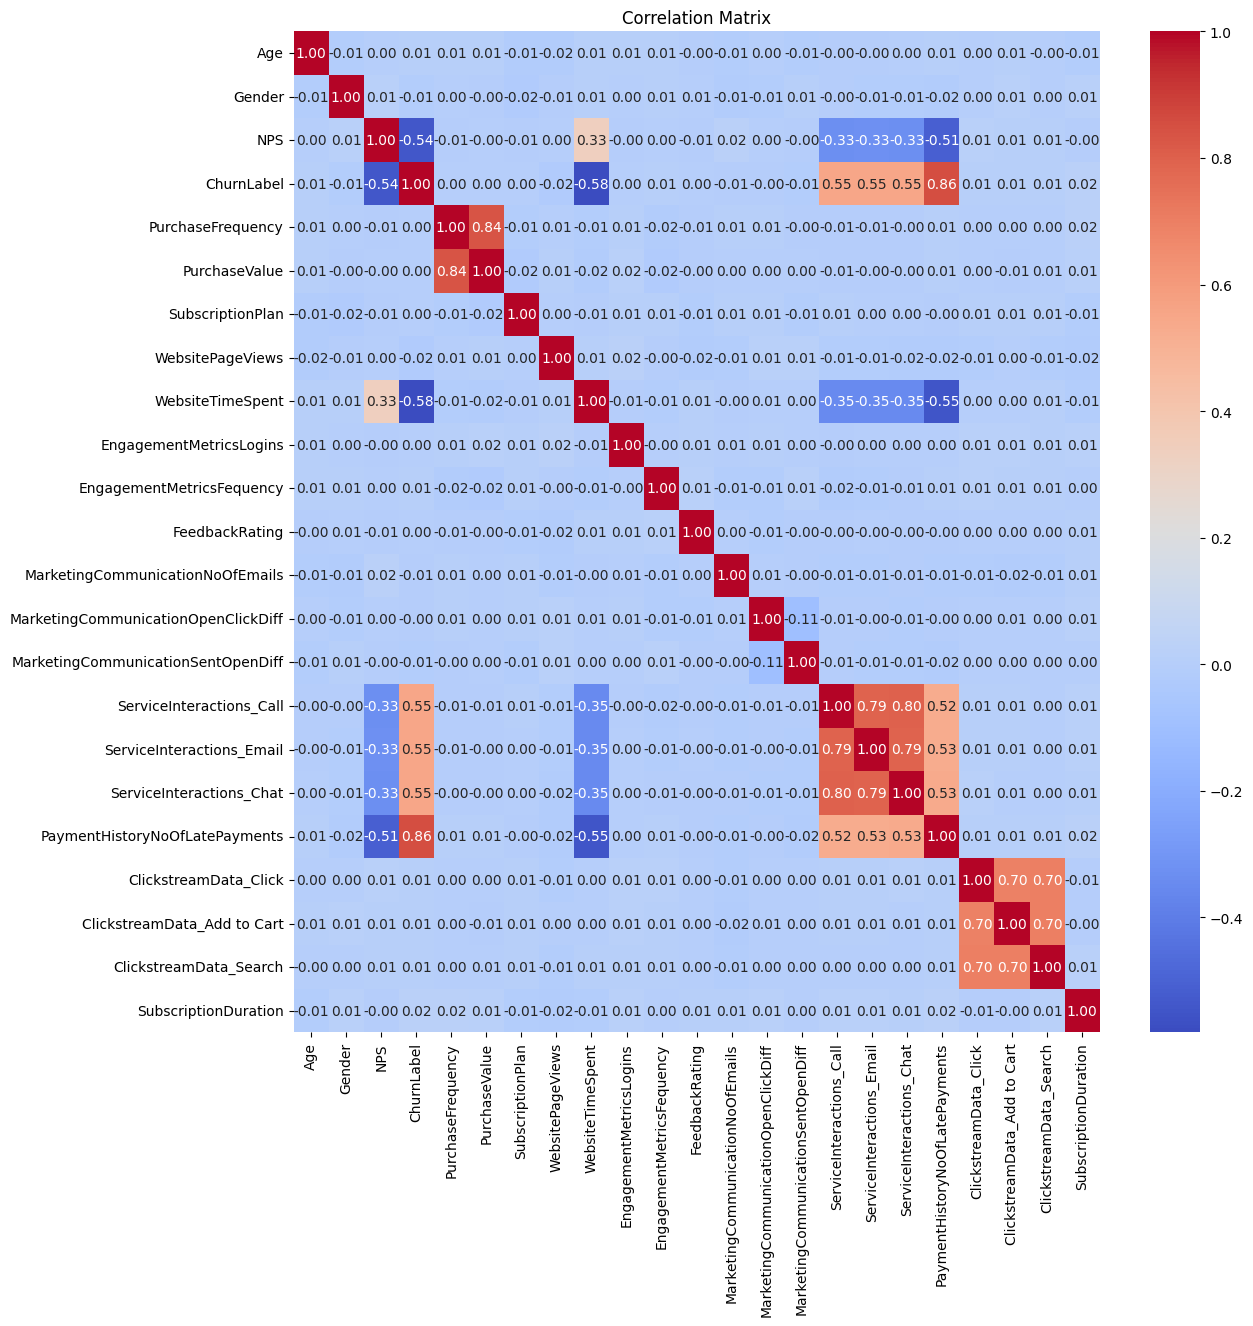

In [39]:
df_corr = df_.corr()

fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
plt.title('Correlation Matrix')
plt.show()
plt.close("all")

###Split data into train, test and validation sets

In [40]:
X = df_.drop('ChurnLabel', axis=1)
y = df_['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8 , random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

###Modeling

Two different models for modeling

-   Logistic Regression

-   DecisionTreeClassifier

**Metrics**

-  Accuracy score

-  Precision Score

-  Recall Score

-  F1 Score

In [42]:
def evaluate(X, y, model, subset = ''):
  y_pred = model.predict(X)

  print(f"{subset} Accuracy Score: {accuracy_score( y_pred, y)}")
  print(f"{subset} Precision Score: {precision_score(y_pred, y)}")
  print(f"{subset} Recall Score: {recall_score(y_pred, y)}")
  print(f"{subset} F1 Score: {f1_score(y_pred, y)}")

###Modeling with Logistic Regression

In [44]:
# Build the model
lr = LogisticRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Evaluate the model on train and  validation  subsets
evaluate(X_train_scaled, y_train, lr, subset='Train')
print()
evaluate(X_val_scaled, y_val, lr, subset='Validation')


Train Accuracy Score: 0.9709593430803124
Train Precision Score: 0.965938176806458
Train Recall Score: 0.9767071471232331
Train F1 Score: 0.9712928133042962

Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


##Modeling with Decisin Trees

In [46]:
# Build  the model
dt = DecisionTreeClassifier(max_depth=5)

# Train the model
dt.fit(X_train_scaled, y_train)

# Evaluate the model on train and  validation  subsets
evaluate(X_train_scaled, y_train, dt, subset='Train')
print()
evaluate(X_val_scaled, y_val, dt, subset='Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335302

Validation Accuracy Score: 0.9693333333333334
Validation Precision Score: 0.9724517906336089
Validation Recall Score: 0.9644808743169399
Validation F1 Score: 0.9684499314128944


### Evaluation on test set

In [47]:
evaluate(X_test_scaled, y_test, lr, subset='LogisticRegression Test')
print()
evaluate(X_test_scaled, y_test, dt, subset='DecisionTreeClassifier Test')

LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precision Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165897

DecisionTreeClassifier Test Accuracy Score: 0.9736691471093303
DecisionTreeClassifier Test Precision Score: 0.9736238532110092
DecisionTreeClassifier Test Recall Score: 0.9736238532110092
DecisionTreeClassifier Test F1 Score: 0.9736238532110092


###Plot confusion matrix next

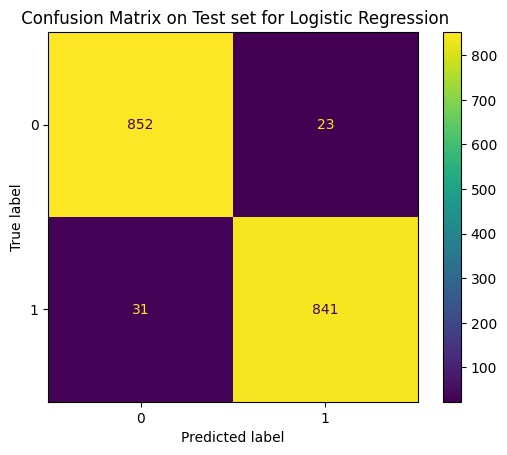

In [53]:
lr_y_pred = lr.predict(X_test_scaled)
logistic_regression_confision_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confision_matrix)
display.plot()
plt.title(' Confusion Matrix on Test set for Logistic Regression')

plt.show()
plt.close("all")

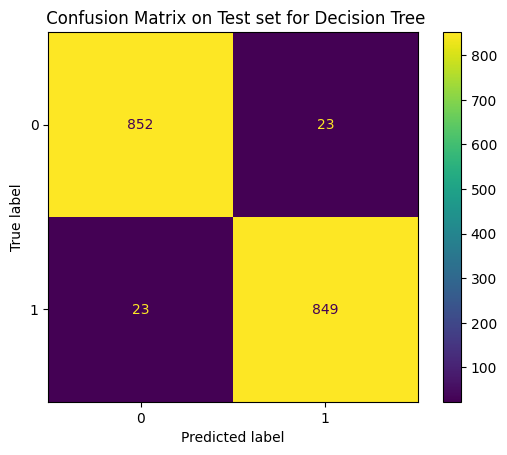

In [54]:
df_y_pred = dt.predict(X_test_scaled)
decision_tree_confision_matrix = confusion_matrix(y_test, df_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confision_matrix)
display.plot()
plt.title(' Confusion Matrix on Test set for Decision Tree')

plt.show()
plt.close("all")

##Conclusion

<hr> </hr>

  The most important features:

        -  The number  of Service Interactions  the customer has had  through Call, Email and  Chat

        -   The number of  times the customer  has made Late Payments,

        -   The  time  spent on the company's website,

        -   The Net Promoter Score (NPS)

  <hr> </hr>
